# Random Forest

### 1. EDA):

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("glass_12.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(df.head())
print(df.tail())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1.0
     RI  Na  Mg  Al  Si   K  Ca  Ba  Fe  Type
994 NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN
995 NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN
996 NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN
997 NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN
998 NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN


### Shape of dataset

In [4]:
print("Shape:", df.shape)

Shape: (999, 10)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Check for Missing Values
### Missing values

In [7]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64


### Percentage missing per column

In [8]:
print((df.isnull().mean() * 100).round(2))

RI      78.58
Na      78.58
Mg      78.58
Al      78.58
Si      78.58
K       78.58
Ca      78.58
Ba      78.58
Fe      78.58
Type    78.58
dtype: float64


### 1. Detect Outliers
### 2. Outliers can be detected using:
### 3. Boxplots
### 4. Z-score
### 5. IQR method

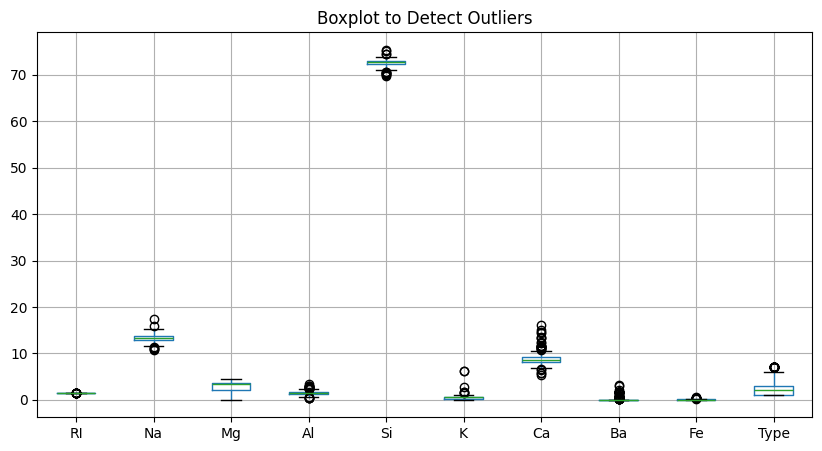

In [9]:
import matplotlib.pyplot as plt
df.boxplot(figsize=(10,5))
plt.title("Boxplot to Detect Outliers")
plt.show()

### Check for Data Inconsistencies

In [10]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 785


##### Unique values in target column

In [11]:
print("Unique classes:", df['Type'].unique())

Unique classes: [ 1.  2.  3.  5.  6.  7. nan]


# 2: Data Visualization:

In [12]:
import matplotlib.pyplot as plt

In [13]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

### Histograms

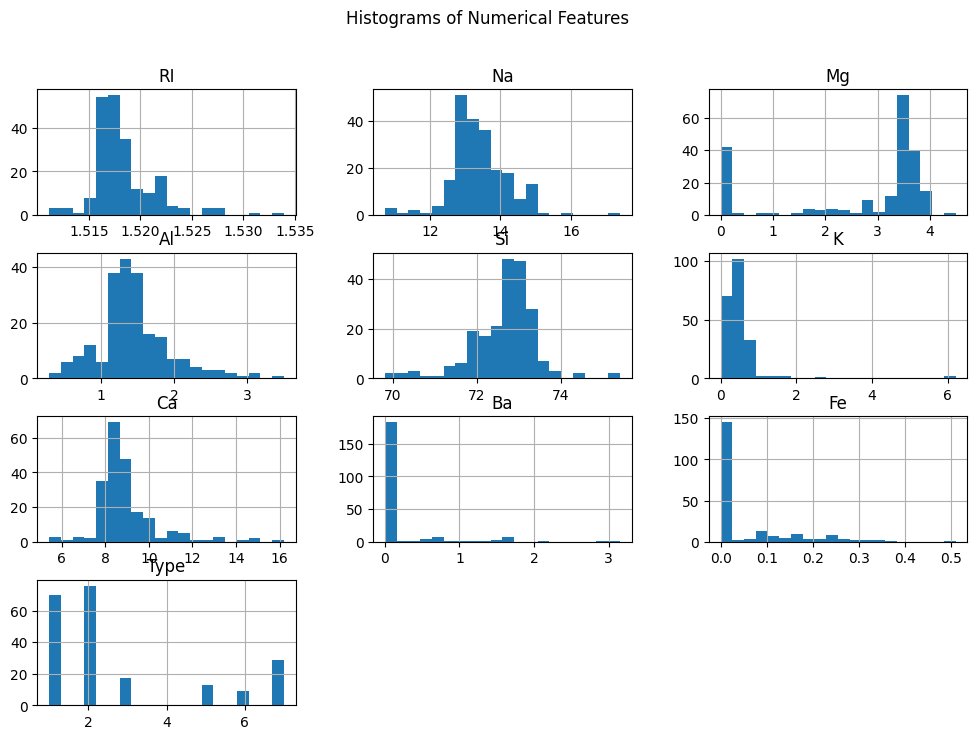

In [14]:
df[numeric_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

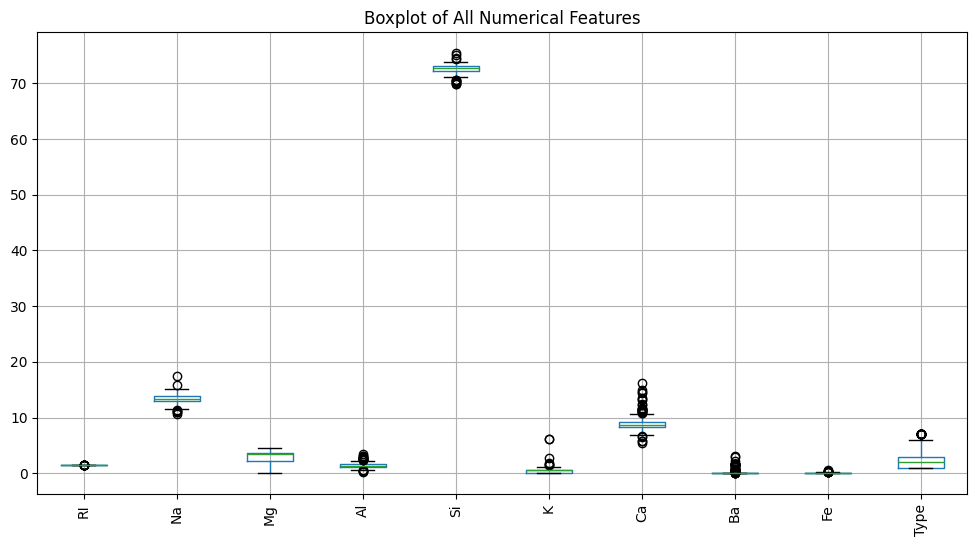

In [15]:
plt.figure(figsize=(12,6))
df[numeric_cols].boxplot()
plt.title("Boxplot of All Numerical Features")
plt.xticks(rotation=90)
plt.show()

In [16]:
print(numeric_cols)

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


#### Bivariate Analysis (Feature vs Target)
#### Purpose:
#### Understand which features influence the glass type.
#### Example plots:
#### Box plot of each feature vs target
#### Violin plot
#### Bar chart for class distribution

In [17]:
import seaborn as sns

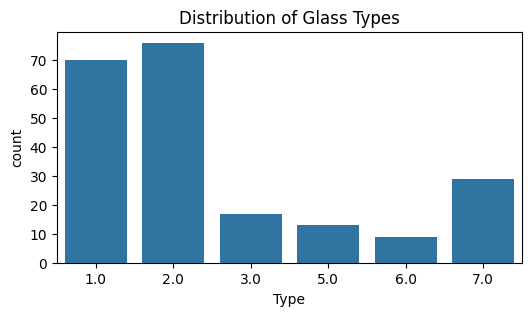

In [18]:
plt.figure(figsize=(6,3))
sns.countplot(x='Type', data=df)
plt.title("Distribution of Glass Types")
plt.show()

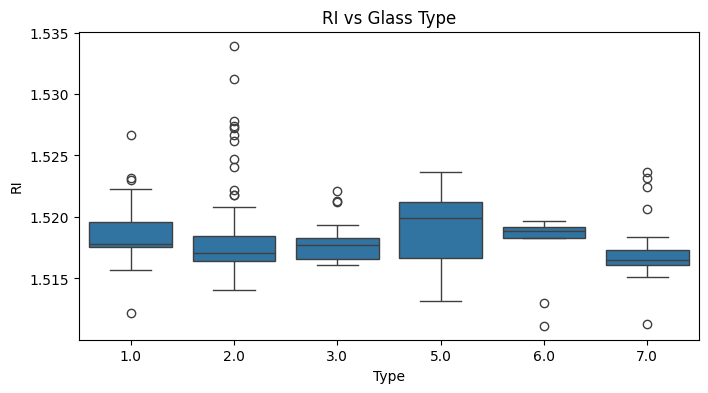

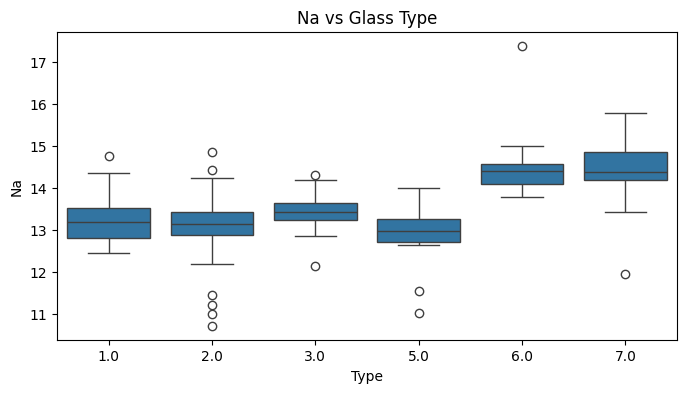

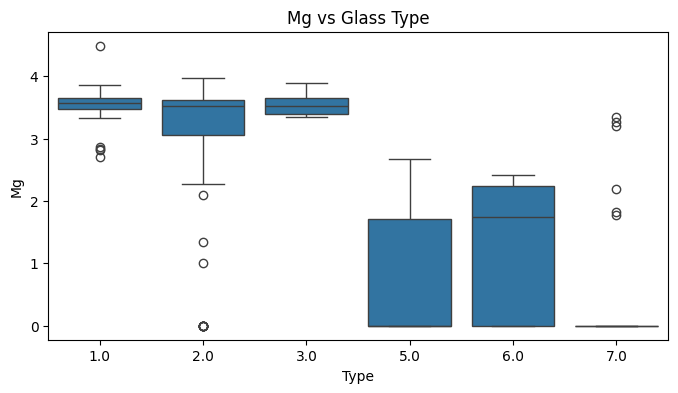

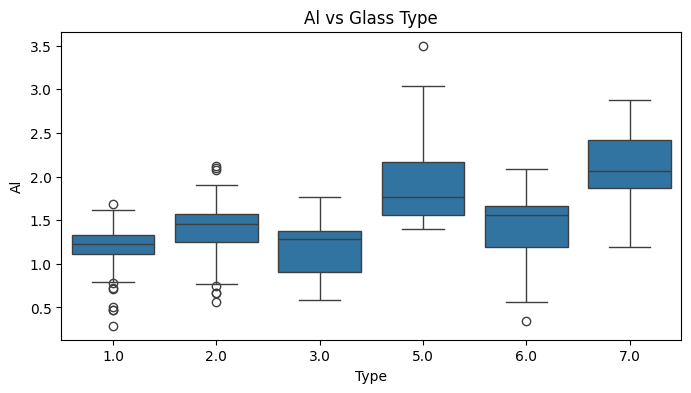

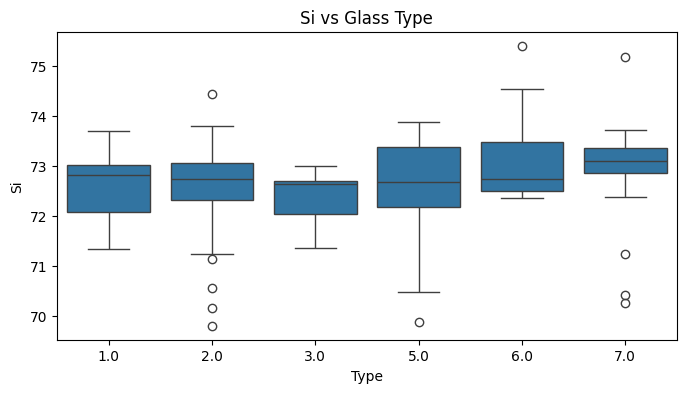

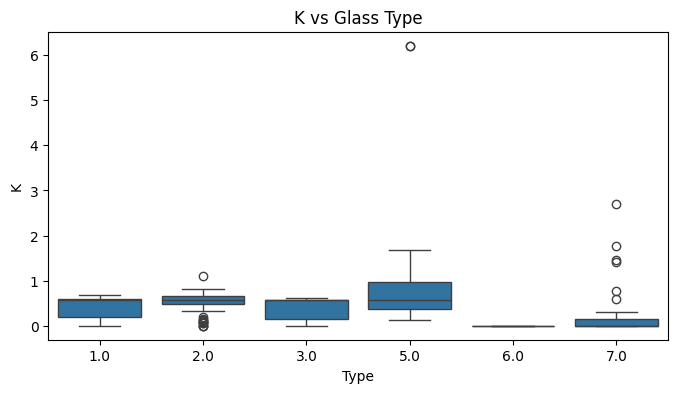

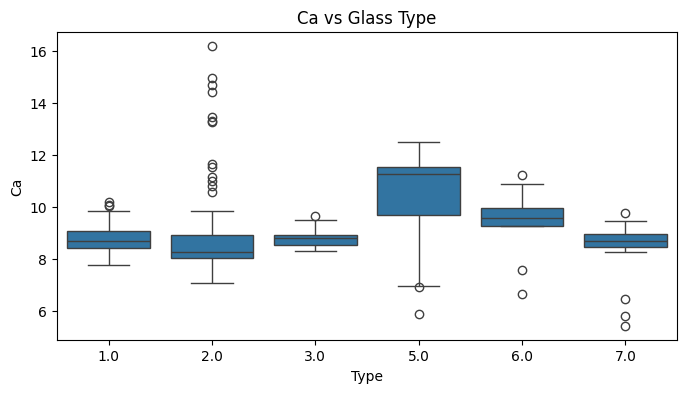

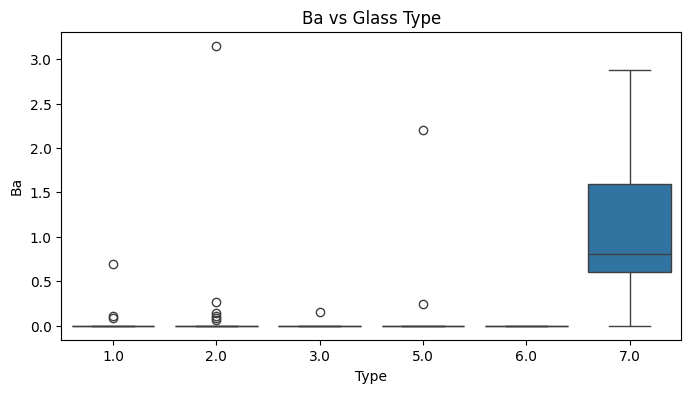

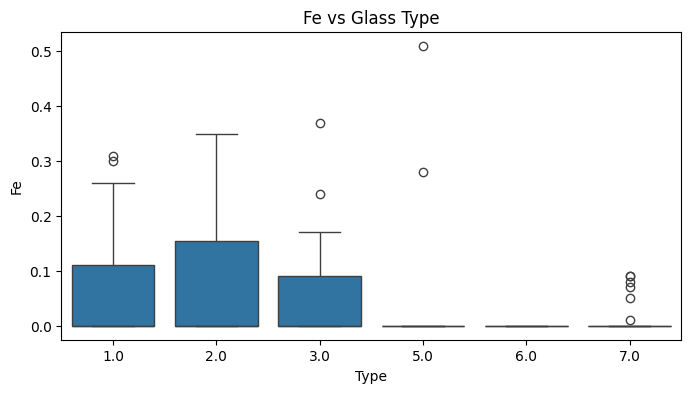

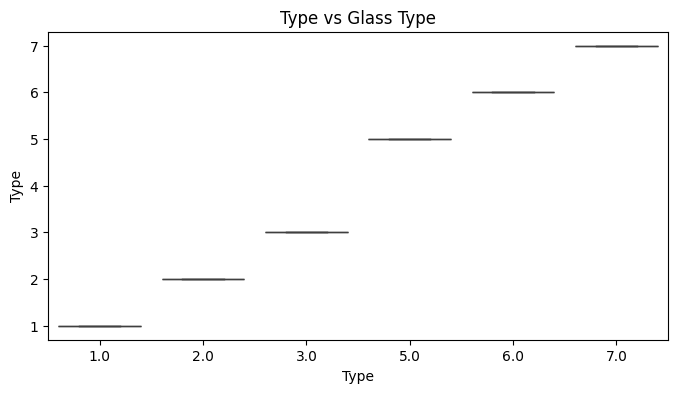

In [19]:
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Type', y=col, data=df)
    plt.title(f"{col} vs Glass Type")
    plt.show()


#### Multivariate Analysis (Relationships Between Features)
#### Pair Plot (Scatterplot Matrix)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Ensure numeric_cols is a list

In [21]:
numeric_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)

#### Remove Type if it is in numeric list

In [22]:
if 'Type' in numeric_cols:
    numeric_cols.remove('Type')

#### Pairplot

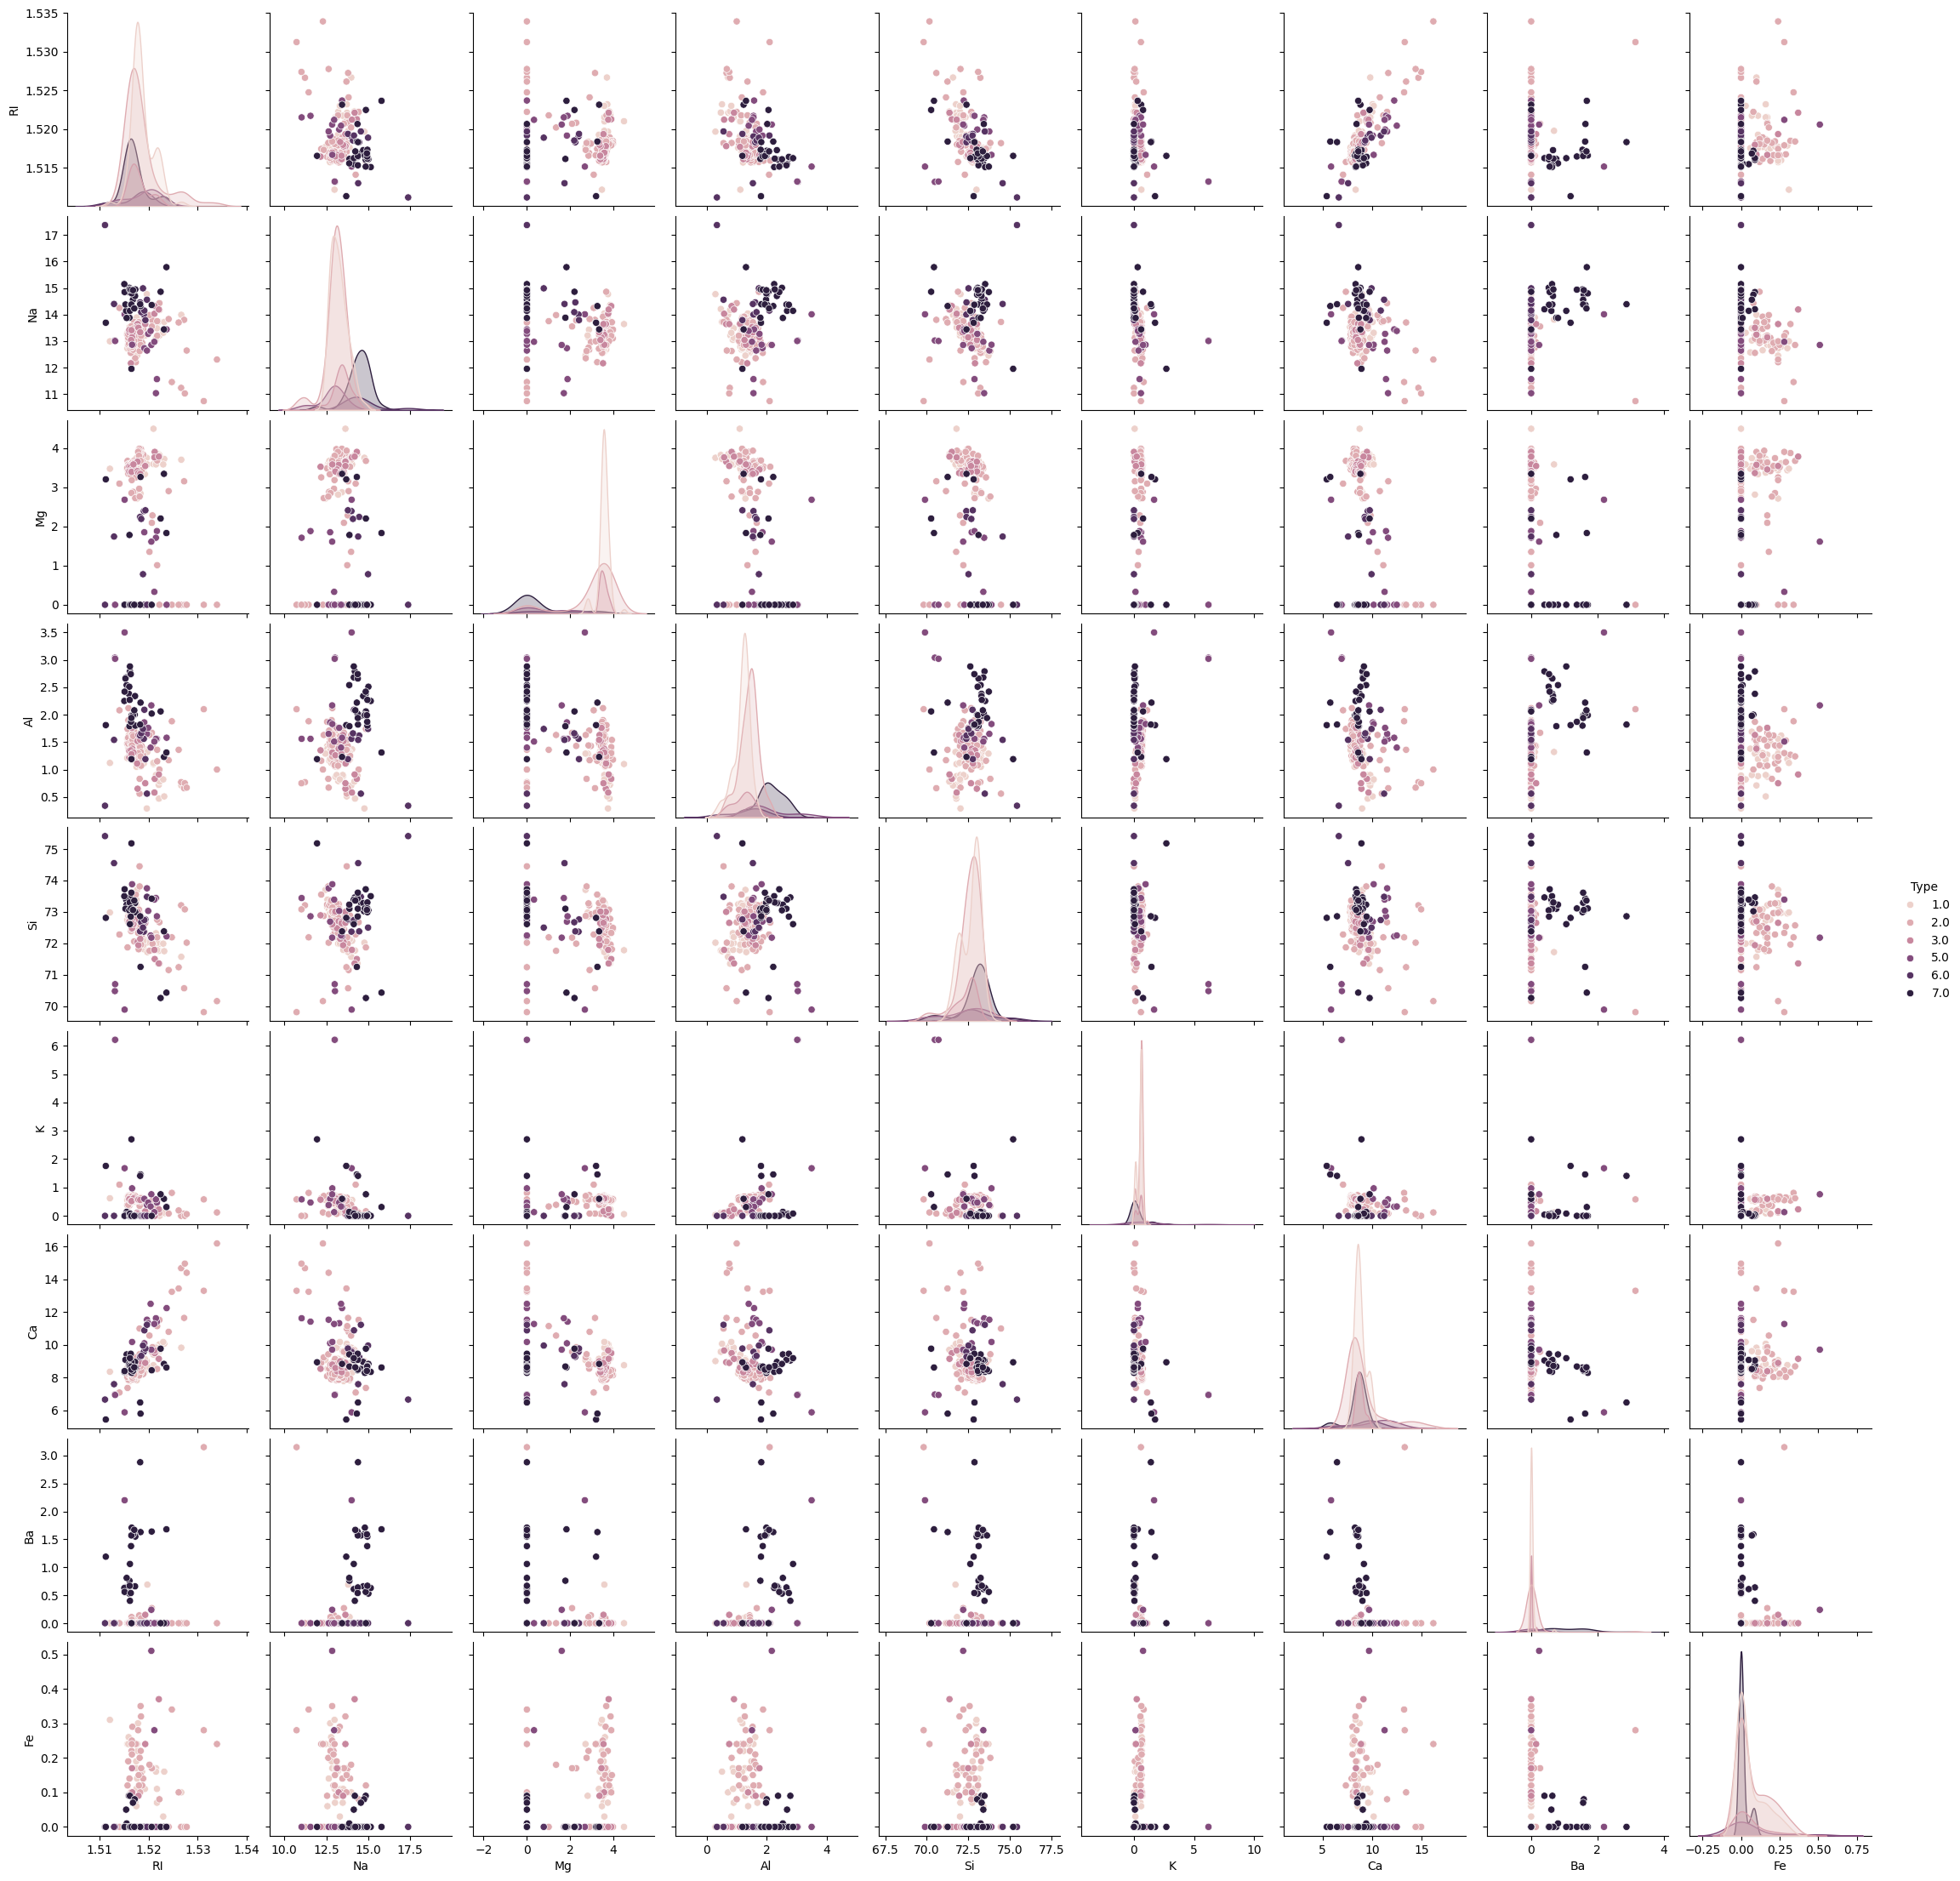

In [23]:
sns.pairplot(df[numeric_cols + ['Type']], hue='Type')
plt.show()

#### Correlation Matrix & Heatmap

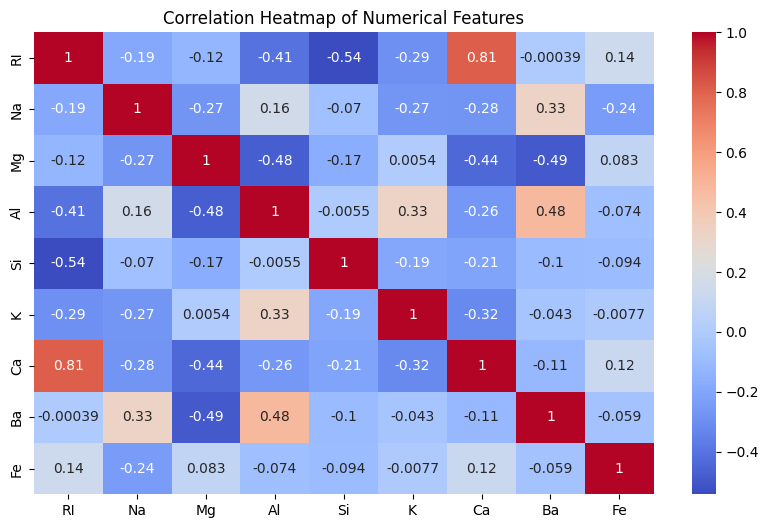

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

#### Pairwise Relationships with Target

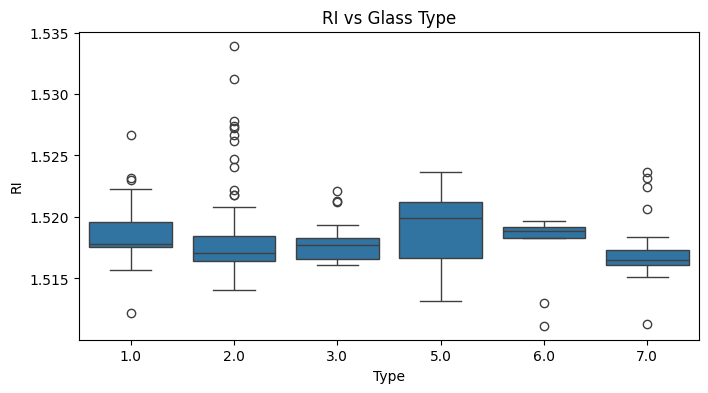

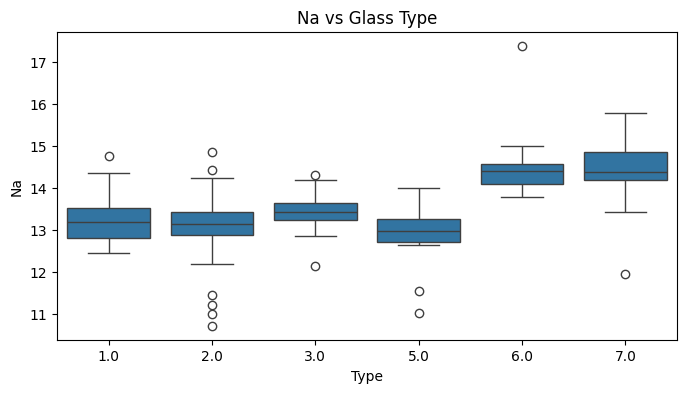

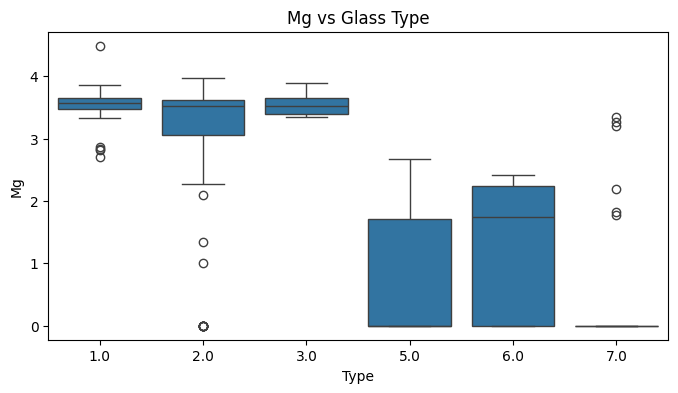

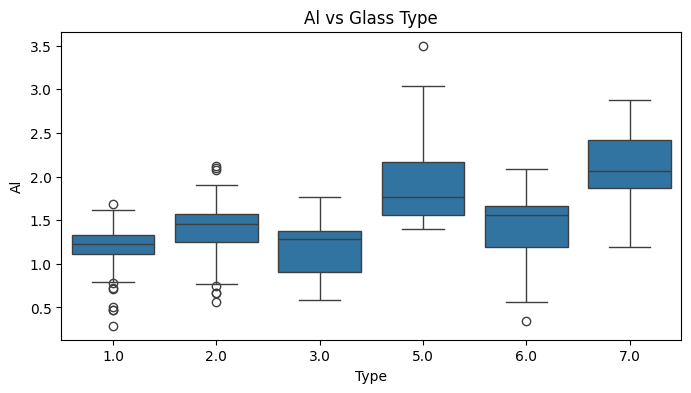

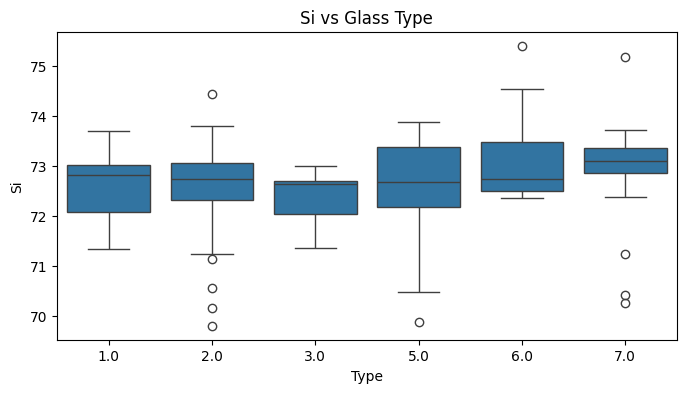

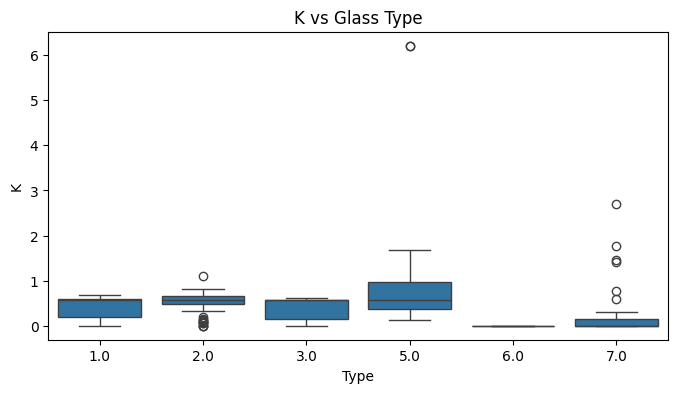

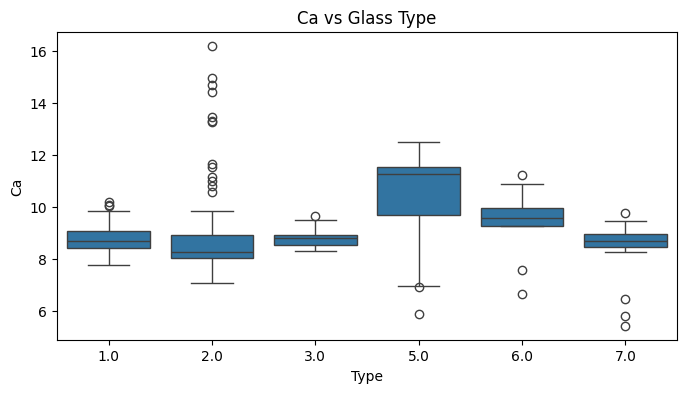

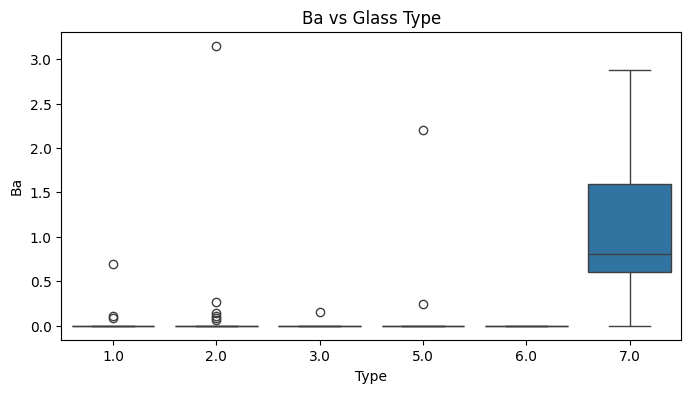

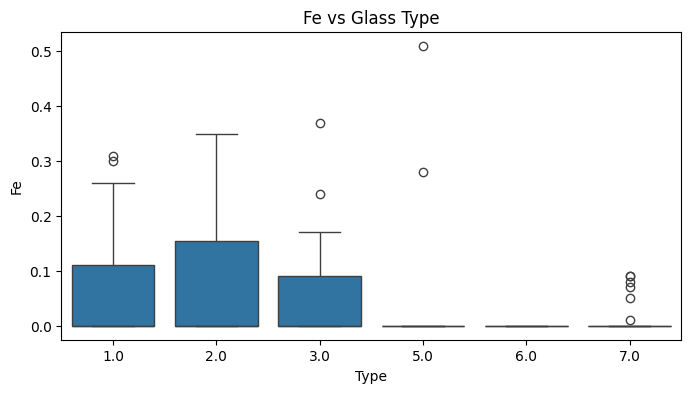

In [25]:
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Type', y=col, data=df)
    plt.title(f"{col} vs Glass Type")
    plt.show()

# 3: Data Preprocessing

#### Check the missing values

In [26]:
df.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

#### Percentage of missing values

In [27]:
(df.isnull().mean() * 100).round(2)

RI      78.58
Na      78.58
Mg      78.58
Al      78.58
Si      78.58
K       78.58
Ca      78.58
Ba      78.58
Fe      78.58
Type    78.58
dtype: float64

#### Implement Missing Value Imputation (Median)

In [28]:
from sklearn.impute import SimpleImputer

In [29]:
imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 RI        0
Na        0
Mg        0
Al        0
Si        0
K         0
Ca        0
Ba        0
Fe        0
Type    785
dtype: int64


#### Encoding Categorical Variables

In [31]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type    float64
dtype: object

## Apply One-Hot Encoding

In [32]:
categorical_cols = df.select_dtypes(include=['object']).columns

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Dataset after encoding:\n", df.head())

Dataset after encoding:
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1.0


#### Glass dataset usually has only numeric features, except sometimes the target variable.
#### If the target is categorical, use Label Encoding:

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

#### Standardization

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Type', axis=1))
y = df['Type']

#### Handling Imbalanced Data

In [37]:
print("Class Distribution:")
print(y.value_counts())

Class Distribution:
Type
6    785
1     76
0     70
5     29
2     17
3     13
4      9
Name: count, dtype: int64


#### Random Oversampling (Simple Method)

In [41]:
from sklearn.utils import resample
import pandas as pd

df_full = pd.concat([pd.DataFrame(X), y.reset_index(drop=True)], axis=1)
df_full.columns = list(df.drop('Type', axis=1).columns) + ['Type']

max_count = df_full['Type'].value_counts().max()
frames = []

for cls, count in df_full['Type'].value_counts().items():
    cls_df = df_full[df_full['Type'] == cls]
    if count < max_count:a
        cls_df = resample(cls_df, replace=True, n_samples=max_count, random_state=42)
    frames.append(cls_df)

df_balanced = pd.concat(frames)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_bal, y_bal = sm.fit_resample(X, y)

# 4: Random Forest Model Implementation


### 1. Divide the data into train and test split.
### 2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
### 3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [43]:
from sklearn.model_selection import train_test_split

#### Assuming X (features) and y (target) are already defined after preprocessing

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [45]:
X_train.shape

(749, 9)

In [48]:
X_test.shape

(250, 9)

#### Build the Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#### Train the model

In [50]:
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Test predictions

In [51]:
y_pred = rf_model.predict(X_test)

#### Model Evaluation

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import pandas as pd

### Metrics

In [54]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

In [55]:
print(" Model Performance on Test Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

 Model Performance on Test Data:
Accuracy: 0.9520
Precision: 0.9559
Recall: 0.9520
F1-Score: 0.9495


In [56]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        18
           1       0.79      0.79      0.79        19
           2       1.00      0.25      0.40         4
           3       1.00      0.67      0.80         3
           4       0.50      0.50      0.50         2
           5       0.75      0.86      0.80         7
           6       1.00      1.00      1.00       197

    accuracy                           0.95       250
   macro avg       0.83      0.71      0.73       250
weighted avg       0.96      0.95      0.95       250



In [57]:
print("\nConfusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))


Confusion Matrix:
    0   1  2  3  4  5    6
0  16   2  0  0  0  0    0
1   2  15  0  0  1  1    0
2   3   0  1  0  0  0    0
3   0   1  0  2  0  0    0
4   0   0  0  0  1  1    0
5   0   1  0  0  0  6    0
6   0   0  0  0  0  0  197


### Feature Importance

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

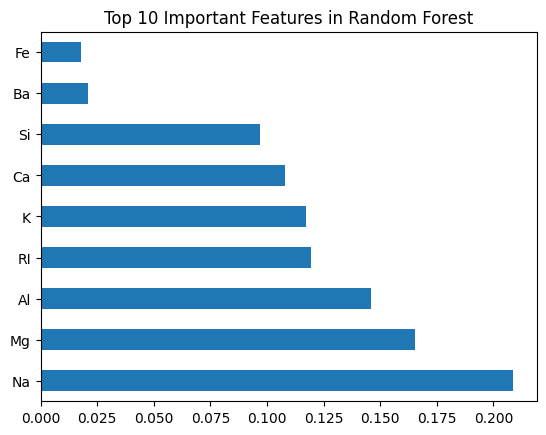

In [60]:
feature_importances = pd.Series(rf_model.feature_importances_, index=df.drop('Type', axis=1).columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features in Random Forest")
plt.show()

# 5: Bagging and Boosting Methods

### Apply the Bagging and Boosting methods and compare the results.

In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [62]:
bag_model = BaggingClassifier(n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)

,estimator,None
,n_estimators,100
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


In [63]:
y_pred_bag = bag_model.predict(X_test)

In [64]:
bag_accuracy = accuracy_score(y_test, y_pred_bag)
bag_precision = precision_score(y_test, y_pred_bag, average='weighted', zero_division=0)
bag_recall = recall_score(y_test, y_pred_bag, average='weighted', zero_division=0)
bag_f1 = f1_score(y_test, y_pred_bag, average='weighted', zero_division=0)

In [65]:
print(" Bagging Model Performance:")
print(f"Accuracy: {bag_accuracy:.4f}")
print(f"Precision: {bag_precision:.4f}")
print(f"Recall: {bag_recall:.4f}")
print(f"F1-Score: {bag_f1:.4f}")

 Bagging Model Performance:
Accuracy: 0.9600
Precision: 0.9607
Recall: 0.9600
F1-Score: 0.9590


### Boosting
### We will implement AdaBoost as required.

In [67]:
from sklearn.ensemble import AdaBoostClassifier

In [68]:
adb_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adb_model.fit(X_train, y_train)

,estimator,None
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42


In [69]:
y_pred_adb = adb_model.predict(X_test)

In [70]:
adb_accuracy = accuracy_score(y_test, y_pred_adb)
adb_precision = precision_score(y_test, y_pred_adb, average='weighted', zero_division=0)
adb_recall = recall_score(y_test, y_pred_adb, average='weighted', zero_division=0)
adb_f1 = f1_score(y_test, y_pred_adb, average='weighted', zero_division=0)

In [71]:
print("\n AdaBoost Model Performance:")
print(f"Accuracy: {adb_accuracy:.4f}")
print(f"Precision: {adb_precision:.4f}")
print(f"Recall: {adb_recall:.4f}")
print(f"F1-Score: {adb_f1:.4f}")


 AdaBoost Model Performance:
Accuracy: 0.9280
Precision: 0.9137
Recall: 0.9280
F1-Score: 0.9194


### Compare Random Forest, Bagging, and Boosting

In [73]:
results = pd.DataFrame({
    "Model": ["Random Forest", "Bagging", "AdaBoost"],
    "Accuracy": [accuracy, bag_accuracy, adb_accuracy],
    "Precision": [precision, bag_precision, adb_precision],
    "Recall": [recall, bag_recall, adb_recall],
    "F1-Score": [f1, bag_f1, adb_f1]
})

In [74]:
print("\n Model Comparison:")
print(results)


 Model Comparison:
           Model  Accuracy  Precision  Recall  F1-Score
0  Random Forest     0.952   0.955857   0.952  0.949477
1        Bagging     0.960   0.960688   0.960  0.959019
2       AdaBoost     0.928   0.913734   0.928  0.919405


# 1. Explain Bagging and Boosting methods. How is it different from each other

# Bagging (Bootstrap Aggregating) : Bagging, short for Bootstrap Aggregating, is an ensemble learning technique used to improve the accuracy and robustness of machine learning models. It aims to reduce variance and minimize the risk of overfitting, especially for high-variance models like decision trees. The core idea behind bagging is to create multiple subsets of the training data by randomly sampling with replacement. Each of these subsets is used to train a separate model independently. Once all models are trained, their predictions are aggregated to produce the final result—using majority voting for classification tasks or averaging for regression problems. A widely used example of bagging is the Random Forest algorithm, which trains multiple decision trees on different random subsets and combines their outputs to make a final decision.
# Boosting : Boosting is another powerful ensemble technique, but unlike bagging, it builds models sequentially. In boosting, each new model is trained to correct the mistakes made by the previous one. It assigns more weight to the data points that were incorrectly predicted in earlier rounds, forcing the subsequent models to focus more on those difficult cases. This sequential learning process continues for a fixed number of iterations or until the model achieves satisfactory performance. The final prediction is a weighted combination of all individual models. Boosting is effective in reducing bias and often achieves higher accuracy than bagging methods. However, because it continuously learns from errors, it can also be prone to overfitting if not properly regularized. Popular boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.

# Bagging vs. Boosting While both bagging and boosting are ensemble techniques that combine multiple models to enhance performance, they differ fundamentally in their approach. Bagging focuses on reducing variance by training multiple models in parallel on different subsets of the data. Each model has equal weight in the final prediction. In contrast, boosting reduces bias by training models sequentially, where each model builds on the errors of its predecessor. Additionally, boosting pays more attention to challenging samples by increasing their importance in subsequent iterations. Bagging is generally more stable and less likely to overfit, while boosting, though often more accurate, must be tuned carefully to avoid overfitting.

# 2. Explain how to handle imbalance in the data.
# Handling Class Imbalance Class imbalance is a common issue in classification problems where some classes are significantly underrepresented compared to others. This imbalance can lead to biased models that perform well on the majority class but poorly on the minority class. To address this, several techniques can be applied. One approach is resampling, which includes oversampling the minority class or undersampling the majority class. A popular oversampling method is SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic samples for the minority class to balance the dataset.

# In conclusion, both bagging and boosting are valuable ensemble strategies, each with its own strengths—bagging for reducing variance and boosting for reducing bias. When dealing with imbalanced datasets, it's essential to use techniques such as SMOTE, class weighting, and proper evaluation metrics to ensure fair and effective model performance. Combining ensemble learning with strategies to handle class imbalance leads to more accurate, robust, and generalizable classification models.